In [2]:
import sys
import datetime
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import datasets
from keras import backend as BB
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Using TensorFlow backend.


In [3]:
dataset = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = dataset.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
typ = BB.image_data_format()
typ

'channels_last'

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
row, col = 32, 32
x_train = x_train.reshape(x_train.shape[0], row, col, 3)
x_test = x_test.reshape(x_test.shape[0],row, col, 3)
inp_shape = (row, col, 3)
inp_shape

(32, 32, 3)

In [8]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=3, activation='relu', input_shape = inp_shape, padding='same'))
cnn.add(Dropout(0.3))
cnn.add(MaxPool2D(pool_size=2))
cnn.add(Conv2D(64, kernel_size=3, activation='relu',padding= 'same'))
cnn.add(MaxPool2D(pool_size=2))
cnn.add(Conv2D(94, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 94)          54238     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 94)          0

In [ ]:
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=50, verbose= 2, validation_data=(x_test, y_test) )

Epoch 1/50
391/391 - 100s - loss: 1.6957 - accuracy: 0.3757 - val_loss: 1.3899 - val_accuracy: 0.5216
Epoch 2/50
391/391 - 100s - loss: 1.3427 - accuracy: 0.5166 - val_loss: 1.2626 - val_accuracy: 0.5746
Epoch 3/50
391/391 - 101s - loss: 1.2017 - accuracy: 0.5731 - val_loss: 1.1525 - val_accuracy: 0.6011
Epoch 4/50
391/391 - 105s - loss: 1.0947 - accuracy: 0.6124 - val_loss: 1.0147 - val_accuracy: 0.6497
Epoch 5/50
391/391 - 101s - loss: 1.0200 - accuracy: 0.6386 - val_loss: 0.9710 - val_accuracy: 0.6696
Epoch 6/50
391/391 - 101s - loss: 0.9572 - accuracy: 0.6635 - val_loss: 0.9199 - val_accuracy: 0.6735
Epoch 7/50
391/391 - 101s - loss: 0.9031 - accuracy: 0.6828 - val_loss: 0.8901 - val_accuracy: 0.6922
Epoch 8/50
391/391 - 101s - loss: 0.8550 - accuracy: 0.7000 - val_loss: 0.8597 - val_accuracy: 0.7042
Epoch 9/50
391/391 - 101s - loss: 0.8185 - accuracy: 0.7140 - val_loss: 0.8399 - val_accuracy: 0.7065
Epoch 10/50
391/391 - 104s - loss: 0.7831 - accuracy: 0.7282 - val_loss: 0.8087 - 

make the data agumentation to see the difference 


In [11]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,shear_range=0.2, zoom_range=0.2)


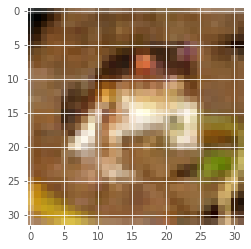

In [19]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0])

In [30]:
augu_train = gen.flow(x_train, y_train, batch_size= 50)
augu_validation = gen.flow(x_test, y_test, batch_size = 50)

In [31]:
histo = cnn.fit_generator(augu_train, steps_per_epoch=1000, epochs=15, validation_data= augu_validation, verbose= 2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
1000/1000 - 111s - loss: 1.7564 - accuracy: 0.1072 - val_loss: 1.4744 - val_accuracy: 0.0813
Epoch 2/15
1000/1000 - 111s - loss: 1.4379 - accuracy: 0.0942 - val_loss: 1.2948 - val_accuracy: 0.0776
Epoch 3/15
1000/1000 - 111s - loss: 1.2965 - accuracy: 0.0965 - val_loss: 1.2724 - val_accuracy: 0.0617
Epoch 4/15
1000/1000 - 111s - loss: 1.2126 - accuracy: 0.0978 - val_loss: 1.1346 - val_accuracy: 0.0782
Epoch 5/15
1000/1000 - 113s - loss: 1.1443 - accuracy: 0.0988 - val_loss: 1.1360 - val_accuracy: 0.0877
Epoch 6/15
1000/1000 - 111s - loss: 1.0956 - accuracy: 0.0985 - val_loss: 1.0408 - val_accuracy: 0.0792
Epoch 7/15
1000/1000 - 111s - loss: 1.0544 - accuracy: 0.0999 - val_loss: 1.0153 - val_accuracy: 0.0930
Epoch 8/15
1000/1000 - 110s - loss: 1.0221 - accuracy: 0.0991 - val_loss: 0.9763 - val_accuracy: 0.1034
Epoch 9/15
1000/1000 - 110s - loss: 0.9994 - accuracy: 0.1004 - val_loss: 1.0166 - val_accur